In [31]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
from shapely.geometry import Point

## Reading a ESRI shapefile 

In [51]:
districts = gpd.read_file("Shapefiles/districts.shp")
print(type(districts))
districts

<class 'geopandas.geodataframe.GeoDataFrame'>


,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."
5,Antrim and Newtownabbey,"POLYGON ((-6.16426 54.81062, -6.16405 54.81063..."
6,Ards and North Down,"MULTIPOLYGON (((-5.74192 54.67759, -5.74190 54..."
7,Fermanagh and Omagh,"POLYGON ((-6.99814 54.78009, -6.99806 54.78010..."
8,Derry City and Strabane,"POLYGON ((-7.25762 55.06648, -7.25759 55.06648..."
9,Causeway Coast and Glens,"MULTIPOLYGON (((-6.48405 55.25194, -6.48401 55..."


Contains the geometrical properties of each of the districts

## Plotting the shape files

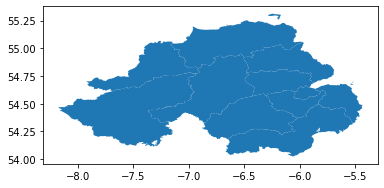

In [5]:
districts.plot()
plt.show()

plots the shape file in [World Geodetic System](https://en.wikipedia.org/wiki/World_Geodetic_System) WGS84 coordinate system that are given in degrees. This can be checked by crs command ([crs](https://en.wikipedia.org/wiki/Coordinate_reference_system) stands for coordinate reference system)

In [6]:
crs = districts.crs
crs

{'init': 'epsg:4326'}

4326 is just the EPSG identifier of WGS84. 

**EPSG: European Petroleum Survey Group**

They publish a database of coordinate system information plus some very good related documents on map projections and datums.

### Changing the plot attributes:

Change the color of the plot:

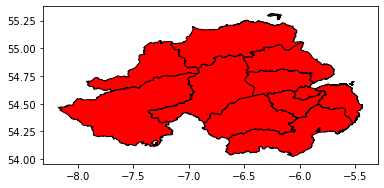

In [7]:
districts.plot(color="red", edgecolor='black')
plt.show()

To have unique color for each districts, we can use cmap property:

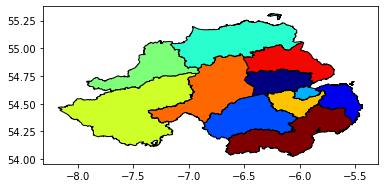

In [8]:
districts.plot(cmap="jet", edgecolor='black', column="district")
plt.show()

## Plotting two layers on the same map

In [9]:
aoi = gpd.read_file("Shapefiles/area_of_interest.shp")
aoi

,Id,geometry
0,0,"POLYGON ((-7.10243 54.53227, -7.10175 54.53254..."


In [10]:
atms = gpd.read_file("Shapefiles//atms.shp")
atms.head()

,operator,geometry
0,Northern Bank,MULTIPOINT (-6.65841 54.50122)
1,None,MULTIPOINT (-6.22666 54.72956)
2,Bank of Ireland,MULTIPOINT (-6.22038 54.80819)
3,None,MULTIPOINT (-6.29858 54.43323)
4,None,MULTIPOINT (-6.21401 54.59141)


Contains the location of all atms in the area of interests

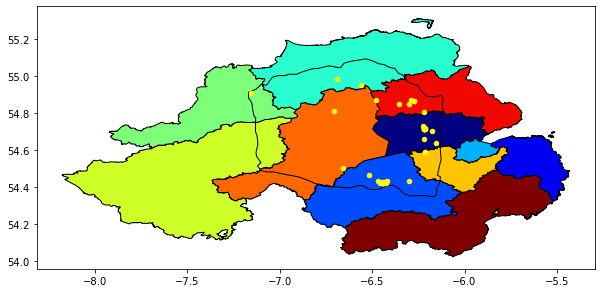

In [11]:
fig,ax = plt.subplots(figsize=(10,8))
districts.plot(ax=ax, cmap="jet", edgecolor="black", column="district")
aoi.plot(ax=ax, edgecolor="black", color='none')
atms.plot(ax=ax, markersize=20, color='yellow')
plt.show()

## Transforming/Reprojecting coordinates into differenct coordinate system

**Why to convert into different coordinate system ?**

Because in the coordinate system we are using is WGS84 in which units are in degrees. The coordinates are plotted on ellipsoid. But to calculate geometrical measurements like area, length, volume etc we need to reproject the coordinate system to 2-D surface. Hence we are going to transform the current coordinates given in WGS84 to UTM (epsg:32629), by which we reproject the coordinates to 2D surface. 

In [68]:
districts = districts.to_crs(epsg=32629)
aoi = aoi.to_crs(epsg=32629)
atms = atms.to_crs(epsg=32629)

C:\Programdata\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [69]:
districts.crs, aoi.crs, atms.crs

('epsg:32629', {'init': 'epsg:32629'}, 'epsg:32629')

dWhile loading the shape file, geopandas recommends to change syntax of crs (coordinate reference system):

```python

## OLD
GeoDataFrame(..., crs={'init': 'epsg:4326'})
# or
gdf.crs = {'init': 'epsg:4326'}
# or
gdf.to_crs({'init': 'epsg:4326'})

## NEW
GeoDataFrame(..., crs="EPSG:4326")
# or
gdf.crs = "EPSG:4326"
# or
gdf.to_crs("EPSG:4326")
```

Otherwise it will throw this depreciation warning:
    
```python
C:\Programdata\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
```


[Read More on manually setting up crs](https://geopandas.org/docs/user_guide/projections.html#manually-specifying-the-crs)

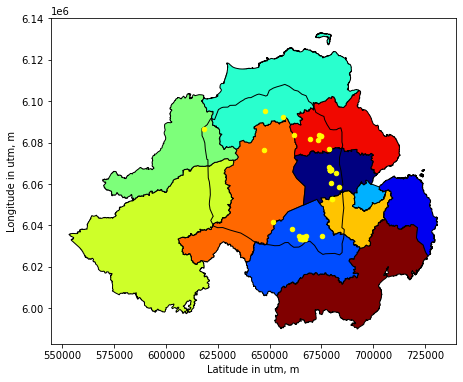

In [70]:
fig,ax = plt.subplots(figsize=(8,6))
districts.plot(ax=ax, cmap="jet", edgecolor="black", column="district")
aoi.plot(ax=ax, edgecolor="black", color='none')
atms.plot(ax=ax, markersize=20, color='yellow')
plt.xlabel("Latitude in utm, m")
plt.ylabel("Longitude in utm, m")
plt.show()

## Intersecting layers

In [78]:
intersection = gpd.overlay(districts, aoi, how="intersection")
intersection

,district,Id,geometry
0,Mid Ulster,0,"POLYGON ((658017.072 6091916.291, 658023.630 6..."
1,Mid and East Antrim,0,"POLYGON ((684916.646 6077240.234, 684908.771 6..."
2,Lisburn and Castlereagh,0,"POLYGON ((685894.696 6035736.759, 685894.090 6..."
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((676032.651 6048086.094, 676033..."
4,Antrim and Newtownabbey,0,"POLYGON ((682226.240 6077404.748, 682239.947 6..."
5,Fermanagh and Omagh,0,"POLYGON ((628746.570 6072158.485, 628751.931 6..."
6,Derry City and Strabane,0,"POLYGON ((622292.459 6091384.089, 622292.384 6..."
7,Causeway Coast and Glens,0,"POLYGON ((671302.332 6097252.019, 671301.064 6..."


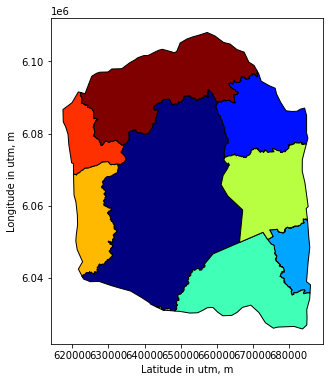

In [79]:
fig, ax = plt.subplots(figsize=(8,6))
intersection.plot(ax=ax, cmap="jet", edgecolor="black")
plt.xlabel("Latitude in utm, m")
plt.ylabel("Longitude in utm, m")
plt.show()

## Finding the area 

In [80]:
intersection["area in km2"] = intersection.area/10e6
intersection

,district,Id,geometry,area in km2
0,Mid Ulster,0,"POLYGON ((658017.072 6091916.291, 658023.630 6...",157.442008
1,Mid and East Antrim,0,"POLYGON ((684916.646 6077240.234, 684908.771 6...",37.369106
2,Lisburn and Castlereagh,0,"POLYGON ((685894.696 6035736.759, 685894.090 6...",15.173787
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((676032.651 6048086.094, 676033...",55.393282
4,Antrim and Newtownabbey,0,"POLYGON ((682226.240 6077404.748, 682239.947 6...",46.282292
5,Fermanagh and Omagh,0,"POLYGON ((628746.570 6072158.485, 628751.931 6...",26.299644
6,Derry City and Strabane,0,"POLYGON ((622292.459 6091384.089, 622292.384 6...",18.750098
7,Causeway Coast and Glens,0,"POLYGON ((671302.332 6097252.019, 671301.064 6...",74.758068


## Exporting the file to ESRI shapefile

In [81]:
intersection.to_file("intersection.shp", driver="ESRI Shapefile")